## 範例重點
### 學習在模型開始前檢查各個環節
1. 是否有 GPU 資源
2. 將前處理轉為函式，統一處理訓練、驗證與測試集
3. 將超參數變數化，易於重複使用函式、模型等

In [1]:
import os
from tensorflow import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 - Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

In [6]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 hidden_layer1 (Dense)       (None, 512)               1573376   
                                                                 
 hidden_layer2 (Dense)       (None, 256)               131328    
                                                                 
 hidden_layer3 (Dense)       (None, 128)               32896     
                                                                 
 output (Dense)              (None, 10)                1290      
                                                                 
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
# 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [8]:
optimizer = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [9]:
history = model.fit(x_train, y_train, 
                    epochs=EPOCHS, 
                    batch_size=BATCH_SIZE, 
                    validation_data=(x_test, y_test), 
                    shuffle=True, 
                    verbose=2)

Epoch 1/100
196/196 - 5s - loss: 1.9288 - accuracy: 0.3023 - val_loss: 1.7650 - val_accuracy: 0.3705 - 5s/epoch - 25ms/step
Epoch 2/100
196/196 - 3s - loss: 1.7171 - accuracy: 0.3850 - val_loss: 1.6488 - val_accuracy: 0.4043 - 3s/epoch - 16ms/step
Epoch 3/100
196/196 - 3s - loss: 1.6169 - accuracy: 0.4209 - val_loss: 1.6002 - val_accuracy: 0.4297 - 3s/epoch - 17ms/step
Epoch 4/100
196/196 - 4s - loss: 1.5568 - accuracy: 0.4430 - val_loss: 1.5103 - val_accuracy: 0.4627 - 4s/epoch - 18ms/step
Epoch 5/100
196/196 - 3s - loss: 1.5114 - accuracy: 0.4599 - val_loss: 1.5798 - val_accuracy: 0.4400 - 3s/epoch - 17ms/step
Epoch 6/100
196/196 - 3s - loss: 1.4743 - accuracy: 0.4720 - val_loss: 1.5951 - val_accuracy: 0.4432 - 3s/epoch - 17ms/step
Epoch 7/100
196/196 - 3s - loss: 1.4438 - accuracy: 0.4852 - val_loss: 1.4902 - val_accuracy: 0.4771 - 3s/epoch - 17ms/step
Epoch 8/100
196/196 - 3s - loss: 1.4114 - accuracy: 0.4988 - val_loss: 1.4376 - val_accuracy: 0.4918 - 3s/epoch - 18ms/step
Epoch 9/

Epoch 67/100
196/196 - 3s - loss: 0.4799 - accuracy: 0.8274 - val_loss: 2.2047 - val_accuracy: 0.5158 - 3s/epoch - 18ms/step
Epoch 68/100
196/196 - 3s - loss: 0.4692 - accuracy: 0.8299 - val_loss: 2.2288 - val_accuracy: 0.5095 - 3s/epoch - 17ms/step
Epoch 69/100
196/196 - 3s - loss: 0.4618 - accuracy: 0.8325 - val_loss: 2.3037 - val_accuracy: 0.5139 - 3s/epoch - 17ms/step
Epoch 70/100
196/196 - 3s - loss: 0.4415 - accuracy: 0.8406 - val_loss: 2.3538 - val_accuracy: 0.5098 - 3s/epoch - 18ms/step
Epoch 71/100
196/196 - 4s - loss: 0.4379 - accuracy: 0.8412 - val_loss: 2.2956 - val_accuracy: 0.5075 - 4s/epoch - 18ms/step
Epoch 72/100
196/196 - 3s - loss: 0.4228 - accuracy: 0.8486 - val_loss: 2.4792 - val_accuracy: 0.5077 - 3s/epoch - 18ms/step
Epoch 73/100
196/196 - 3s - loss: 0.4244 - accuracy: 0.8465 - val_loss: 2.4749 - val_accuracy: 0.5038 - 3s/epoch - 17ms/step
Epoch 74/100
196/196 - 4s - loss: 0.4211 - accuracy: 0.8487 - val_loss: 2.4011 - val_accuracy: 0.5111 - 4s/epoch - 18ms/step


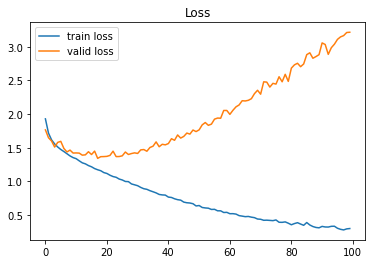

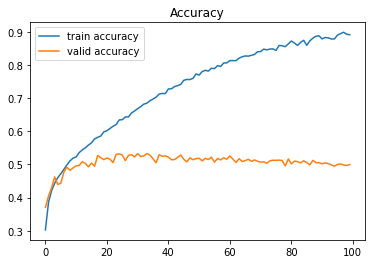

In [10]:
# 訓練模型並檢視驗證集的結果
import matplotlib.pyplot as plt

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.figure()
plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.figure()
plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (可善用 google colab)，比較使用 CPU 與 GPU 的訓練速度